Loading txs_features...
  shape: (203769, 184)
  columns: ['txId', 'Time step', 'Local_feature_1', 'Local_feature_2', 'Local_feature_3', 'Local_feature_4', 'Local_feature_5', 'Local_feature_6', 'Local_feature_7', 'Local_feature_8'] ...

Loading txs_classes...
  shape: (203769, 2)
  class unique: [3 2 1]

Loading txs_edgelist...
  shape: (234355, 2)

=== Features overview ===
    txId  Time step  Local_feature_1  Local_feature_2  Local_feature_3  \
0   3321          1        -0.169615        -0.184668        -1.201369   
1  11108          1        -0.137586        -0.184668        -1.201369   
2  51816          1        -0.170103        -0.184668        -1.201369   
3  68869          1        -0.114267        -0.184668        -1.201369   
4  89273          1         5.202107        -0.210553        -1.756361   

   Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
0        -0.121970        -0.043875        -0.113002        -0.061584   
1        -0.121970        -0.04

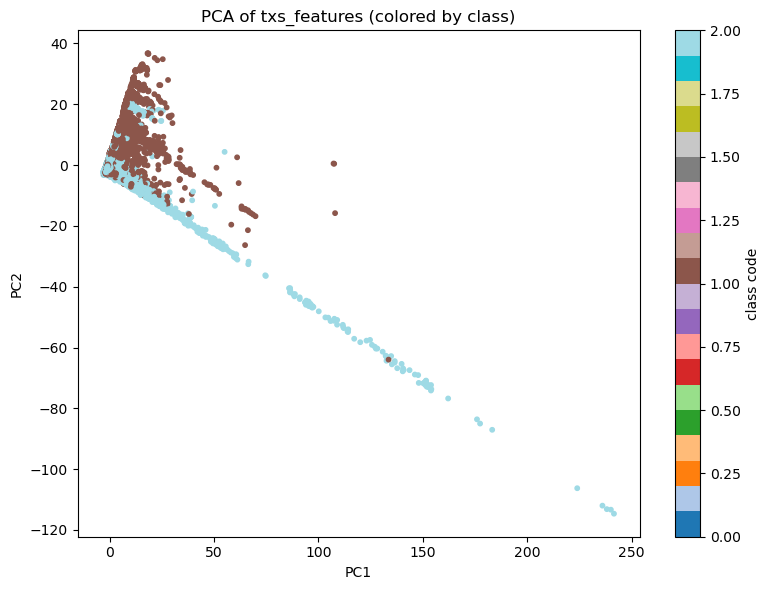


Done.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

TXS_FEATURES = "txs_features.txt"
TXS_CLASSES  = "txs_classes.txt"
TXS_EDGES    = "txs_edgelist.txt"


def run_pca(df_features: pd.DataFrame, df_classes: pd.DataFrame) -> None:
    print("\n=== PCA (2D) ===")

    # 数値列だけ抽出
    num_cols = df_features.select_dtypes(include=[np.number]).columns
    print("Numeric columns:", list(num_cols))
    X = df_features[num_cols].values

    # ラベル（class）を色分け用に整数に変換
    raw_y = df_classes["class"]
    y_codes = pd.Categorical(raw_y).codes  # 0,1,2,... に変換
    print("Class unique (original):", raw_y.unique())
    print("Class codes (for plot):", np.unique(y_codes))

    # NaN を平均値で埋める
    print("NaN count before impute:", int(np.isnan(X).sum()))
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)
    print("NaN count after  impute:", int(np.isnan(X_imputed).sum()))

    # 標準化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    # PCA 2次元
    pca = PCA(n_components=2, random_state=0)
    X_pca = pca.fit_transform(X_scaled)

    print("Explained variance ratio:", pca.explained_variance_ratio_)

    # プロット
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                          c=y_codes, cmap="tab20", s=10)
    plt.colorbar(scatter, label="class code")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA of txs_features (colored by class)")
    plt.tight_layout()
    plt.show()


def main() -> None:
    print("Loading txs_features...")
    df_features = pd.read_csv(TXS_FEATURES)
    print("  shape:", df_features.shape)
    print("  columns:", list(df_features.columns[:10]), "...")

    print("\nLoading txs_classes...")
    df_classes = pd.read_csv(TXS_CLASSES)
    print("  shape:", df_classes.shape)
    print("  class unique:", df_classes["class"].unique())

    print("\nLoading txs_edgelist...")
    df_edges = pd.read_csv(TXS_EDGES)
    print("  shape:", df_edges.shape)

    # --- 概要 ---
    print("\n=== Features overview ===")
    print(df_features.head())
    print(df_features.describe(include="all"))
    print("missing values (all columns):",
          int(df_features.isnull().sum().sum()))

    # ★ PCA 可視化
    run_pca(df_features, df_classes)

    print("\nDone.")


if __name__ == "__main__":
    main()